<center>
    
  # DSP: Underlying Concepts

    
## William Eustace M0WJE
## m0@wje.io
</center>


# Today's Objectives
1. Time domain, Frequency domain, and how to go from one to the other.
    * Fourier Series
    * Forward & Inverse Fourier Transforms
2. The Sampling Theorem: why can a signal be represented completely by periodic measurements?
    * Sampling theorem
    * Reconstruction filters
3. Impulse Responses & Convolution
    * Brick-wall filters and their problems
    * FIR vs IIR filters

# What is a signal?

* For our purposes: a time-varying function $f(t)$.
* Analogue or digital?
* Discrete or continuous?





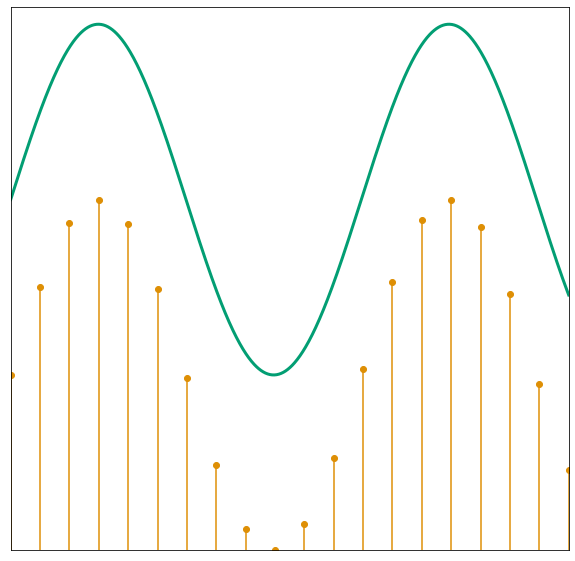

In [1]:
%reset -f
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=3,color=colour_palette[2],linestyle='-')
t_discrete = np.linspace(0,10,20)
s_discrete = np.sin(t_discrete)+1
plt.scatter(t_discrete,s_discrete,color=colour_palette[1])
for td,sd in zip(t_discrete,s_discrete):
    plt.plot([td,td],[0,sd],color=colour_palette[1])
plt.xticks([])
plt.yticks([])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

# Essential Concepts


* A **sum**: \begin{equation} \sum_{n=0}^{M} f(nT)\end{equation}
    
* An **integral**: \begin{equation} \int_{-\pi}^{\pi} f(t) dt \end{equation} 

* A **sum** which (**under some conditions**) _converges_ to an **integral**<sup>1</sup>: \begin{equation} \lim_{\delta T \to 0}( \sum_{n} f(n \delta T) \delta T ) = \int f(t) dt \end{equation} 

    
    
 

 
<sup>1</sup>This is a Riemann integral. Thankfully this is all most of us will ever need...

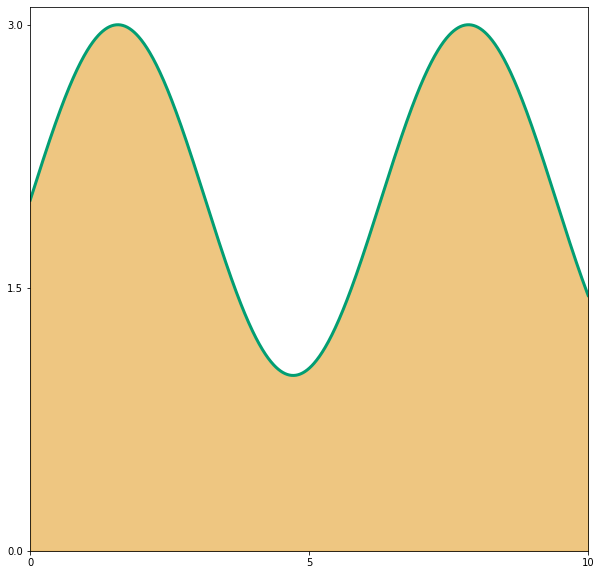

In [2]:
%reset -f
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=3,color=colour_palette[2],linestyle='-')
plt.fill_between(t,0,s,alpha=0.5,color=colour_palette[1])
plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

$$f(t) = sin(t) + 2$$

The integral: $$\int_0^{10} f(t) dt $$
is just the area under this curve. We can also approximate this by a sum: 


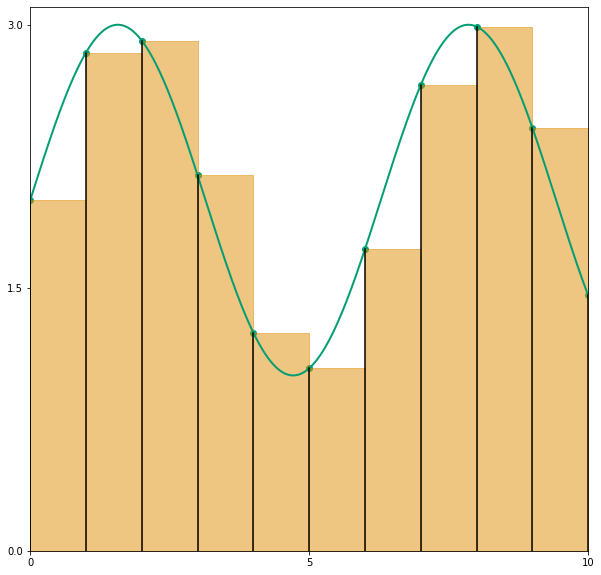

In [3]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=2,color=colour_palette[2],linestyle='-')
t_points = np.linspace(0,10,11)
s_points = np.sin(t_points)+2
plt.scatter(t_points,s_points,color=colour_palette[2])
for (x,y) in zip(t_points,s_points):
    plt.plot([x,x],[0,y],color='black')
    plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()

(with $\delta T =1$) 
$$\sum_{n=0}^{10} 1 \times f(n \times 1) $$

Now, intuitively it seems that as $\delta T \to 0$, we get a better estimate of the area: when we get to an infinitesimal $\delta T$, we obtain the integral. 


# Waterfalls & Heated Plates


* Probably all have heard of the Fourier Transform and seen a waterfall display like this; do you know why it works? 
<center>
<img src="GEO_MFSK22.png" />
<img src="ET_20m.png" width=800px />
</center>

(images from George M1GEO and John M5ET respectively)



* A common goal in computing the Fourier **transform** is to determine how much energy/signal there is at a given frequency. We will fudge our way into this by starting from the basics...

# Towards Fourier Space
* Ways of approximating a function: Taylor Series
$$f(x) \approx a_0 + a_1 x + a_2 x^2 + a_3 x^3 + ... \rm{for\ some\ }a_i$$

<br/>


* But what if we want to represent a **periodic** function? We might try <sup>1</sup> 

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 

<sup>1</sup> Advanced students should explain to their neighbours in the next break why we need both sine and cosine terms here.

This is a _Fourier Series_. How do we find $a_i$ and $b_i$? __Orthogonality of sines__

\begin{equation}\int_{-\pi}^\pi sin(\omega_1 x) sin(\omega_2 x) dx = \begin{cases} 
\pi & \forall m=n : m \in \mathbb{Z}\\
0 & m \neq n
\end{cases}\end{equation}
(and the same is true for cos, I promise!)
\begin{equation}\int_{-\pi}^\pi sin(m x) cos(n x) dx = 0 \ \forall  m,n \in \mathbb{Z} \end{equation}

## Orthogonality of Sines

In [4]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[10,10]
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.sin(x)
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
    plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()


interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

* Why does this help us?

$$ f(t) \approx c + a_1 sin(t) + b_1 cos(t) + a_2 sin(2t) + b_2 cos(2t) + ... $$ 
$$ a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(n t) dt $$
$$ b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(t) cos(n t) dt $$

(plus a DC offset...)

\begin{equation} c = \frac{1}{2\pi}\int_{-\pi}^{\pi} f(t) dt \end{equation}



## An example: the square wave


* This is a carefully chosen example: why?
* Formally: $f(t) = \begin{cases}
-1 & -\pi < t < 0 \\
\hspace{0.6em} 1 & \hspace{0.6em}  0 \leq t < \pi
\end{cases}$


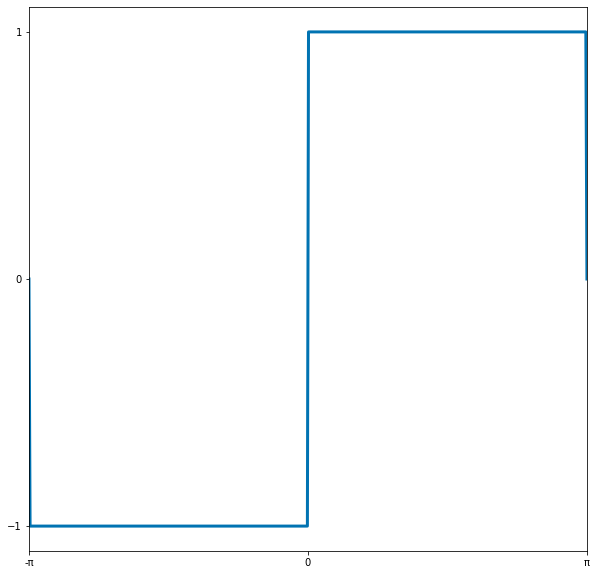

In [5]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(-np.pi,np.pi,500)

plt.xlim(-np.pi,np.pi)

plt.yticks([-1,0,1])
plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
y_1 = np.where(x<0,-1.0,1.0)
y_1[0] = 0
y_1[-1]=0
plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
print()

* Sine series only: there is __no__ DC offset and __no__ cosine term. (those advanced students can discuss this later too)



## Calculating the coefficients


$$a_1 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(t) dt + \int_{0}^\pi 1 sin(t) dt \right] = \frac{4}{\pi}$$

In [6]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,2)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    y_2 = np.sin(m*x)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    product = y_1 * y_2
    
    plt.plot(x,product,color=colour_palette[2],lw=3.0)
    plt.fill_between(x,0,product,color=colour_palette[2],lw=3.0)
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,10,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=5, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

$$a_2 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(2t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(2t) dt + \int_{0}^\pi 1 sin(2t) dt \right] = 0$$


$$a_3 =  \frac{1}{\pi} \int_{-\pi}^\pi f(t) sin(3t) dt $$
$$ =  \frac{1}{\pi}\left[ \int_{-\pi}^0 -1 sin(3t) dt + \int_{0}^\pi 1 sin(3t) dt \right] = \frac{4}{3\pi}$$


(...many hours later...)

(an identity that makes it much easier!)
$$ \int_a^b sin(nt) dt = -\frac{1}{n} \left[cos(nt)\right]^b_a$$
$$cos(n \pi) = \begin{cases}
 1 & \text{even} \ n \\
-1 & \text{odd}\  n
\end{cases}$$

Skipping some algebra (if you enjoy that sort of thing, fair enough...)
$$a_n = \begin{cases}
0 & \text{even n}\\
\frac{4}{n \pi} & \text{odd n}
\end{cases}
$$

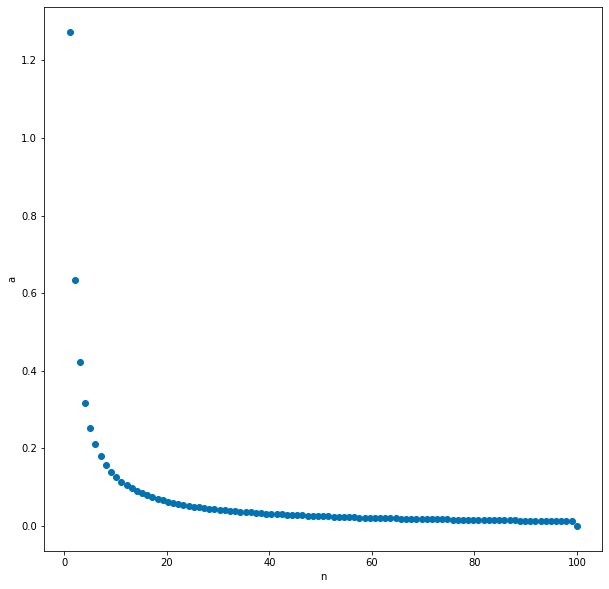

In [17]:

import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns


colour_palette = sns.color_palette("colorblind",3)

x = np.linspace(1,100,99)
y= np.where(x%2==0,0,4/(x*np.pi))



# plt.yticks([-1,0,1])
plt.scatter(x,y,color=colour_palette[0])
plt.xlabel("n")
plt.ylabel("a")
print()

In [18]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
#     m = m_slider.val
    plt.cla()
    y_1 = np.where(x<0,-1.0,1.0)
    y_1[0] = 0
    y_1[-1]=0
    plt.plot(x,y_1,color=colour_palette[0],lw=3.0)
#     plt.plot([-100,100],[0,0],color='black')
    bases = np.linspace(1,m,m)
    
    sin_coefficients = np.where(bases%2==0,0,4 /(bases*np.pi)) 
    sinusoids = np.sin(x*np.reshape(bases,(-1,1)))
    y_2 = np.sum(np.reshape(sin_coefficients,(-1,1))*sinusoids,axis=0)
    plt.plot(x,y_2,color=colour_palette[1],lw=3.0)
    
    plt.xlim(-np.pi,np.pi)

    plt.yticks([-1,0,1])
    plt.xticks([-np.pi,0,np.pi],labels=["-π",0,"π"])
    #plt.title('$sin(x)sin(kx)$',fontsize=30)
    
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(1,21,1))

# mpld3.display(fig)
print()

interactive(children=(IntSlider(value=11, description='m', max=21, min=1), Output()), _dom_classes=('widget-in…

# Something I never told you
### (I'm sorry)

$$ i = \sqrt{-1}$$
$$ i^2 = -1$$

$$ e ^ {i \theta} = cos(\theta) + i sin(\theta)$$




We might _intuitively_ suspect that, if $e^{i \theta}$ is a mixture of sines and cosines, we can represent our old friend the Fourier Series in this fashion. Sure enough, (without proof), 

$$f(t) = \sum_{n=0}^{\infty} a_n e^{i n t} $$

$$ a_n = \frac{1}{2 \pi} \int_{-\pi}^{\pi} f(t) e^{-i n t} dt $$

## Arbitrary Periods

* Why limit ourselves to the interval $[-\pi, \pi ]$ ? 
* Use simple algebra to make the period $T$ instead of $2 \pi$...
* In short, make $t$ go through a range of $2 \pi$ radians in $T$ seconds: multiply by $\frac{2 \pi}{T}$ and iron out the constants!


$$f(t) = \sum_{n=0}^{\infty} a_n e^{i n  \ \times \  \frac{2\pi t}{T}} $$

$$ a_n = \frac{1}{T} \int_{-T/2}^{T/2} f(t) e^{-i n  \ \times \frac{2 \pi t}{T}} dt $$

* This is **all** we need to do before we can move to the Fourier **transform**!

# Fourier Transform
### Problem
* We want to find the frequency content of an aperiodic function
* We do not expect the function to be representable by a sum of discrete frequency trig functions/complex exponentials...
* We will define the time function $f(t)$ and its corresponding Fourier transform $\tilde{F}(k)$ (where $k$ is the frequency in units of $[\frac{1}{[t]}]$)

* To represent the operation of taking the Fourier transform, we will write
$$\tilde{F}(k) = \mathcal{F}\left[ f(t)\right]$$

* There also exists an _inverse_ Fourier transform:
$$ f(t) = \mathcal{F}^{-1} \left[ \tilde{F}(k)\right]$$

_The algebra in this slide is fiddly: ignore the details unless you find them obvious and work them out later. Focus on the concepts._


Begin with the Fourier Series for a function of period $T$.

$$f(t) = \sum_{n=0}^{\infty} a_n e^{i n t \ \times \  \frac{2\pi}{T}} $$

$$ a_n = \frac{1}{T} \int_{-T/2}^{T/2} f(t) e^{-i n t \ \times \frac{2 \pi}{T}} dt $$



* Define a new variable $k=\frac{ n}{T}$. 
* It follows that $n = kT$. 

_(there is no key concept in this - just a constant relationship defined for algebraic convenience)_



* Replace $a_n$ with some function that yields the same coefficients: let's call it $\tilde{F}(k)$. 

* The sum incremented n by 1 each pass. Incrementing $k$ by 1 is equivalent to incrementing $n$ by $T$, so we write $a_n = \tilde{F}(k) \delta k$. For equivalence, $\delta k = \frac{1}{T}$

_We're subtly preparing for a move from discrete 'frequencies' $n$ to continuous values $k$. For now, we 'discretise' the continuous value by multiplying by $\delta k$ and fiddle with the algebra so that it is exactly equivalent to the Fourier series. Remember the Riemann integral earlier?_


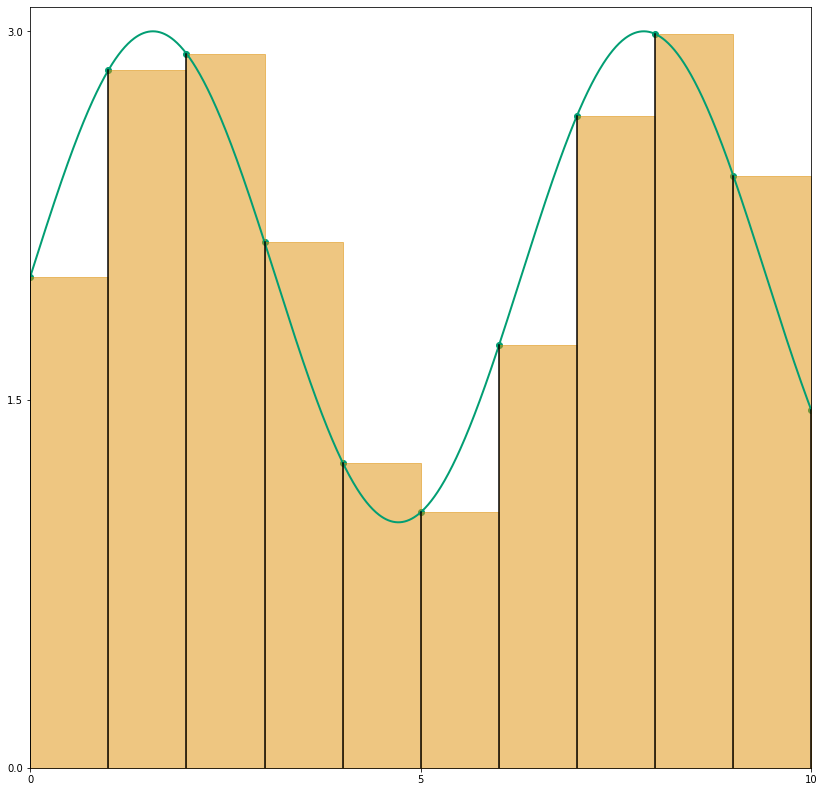

In [9]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[5,5]

t = np.linspace(0,10,1000)
s = np.sin(t)+2 
plt.plot(t,s,lw=2,color=colour_palette[2],linestyle='-')
t_points = np.linspace(0,10,11)
s_points = np.sin(t_points)+2
plt.scatter(t_points,s_points,color=colour_palette[2])
for (x,y) in zip(t_points,s_points):
    plt.plot([x,x],[0,y],color='black')
    plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([0,5,10])
plt.yticks([0,1.5,3])
plt.xlim([0,10])
plt.ylim([0,3.1])
# plt.grid(True)
print()


$$f(t) = \sum_{k=0}^{\infty} \tilde{F}(k)\delta k \  e^{i t \ \times kT \ \times \  \frac{2\pi}{T}} $$

$$ = \sum_{k=0}^{\infty} \tilde{F}(k)\delta k \  e^{2 \pi i t k} $$

* Remember that  $\delta k = \frac{1}{T}$. 
* What about an aperiodic function: $T \to \infty$ ??
* We can take the _limit_ of this, as $\delta k \to 0$.


_Concept: as the function becomes aperiodic, the increment in frequency becomes infinitessimal: we end up with a **continuous frequency spectrum**._

$$f(t) = \lim_{\delta k \to 0} \left( \sum_{k=0}^\infty \tilde{F}(k) \delta k e^{2 \pi itk} \right)$$
* This is just like the sum converging to an integral from earlier!

$$f(t) = \int_{-\infty}^\infty \tilde{F}(k) e^{2 \pi itk} dk $$

_This is the inverse Fourier Transform: what we've just written is equivalent to_$ f(t) = \mathcal{F}^{-1} (\tilde{F}(k))$
 

## Fourier, finally!
### Forward
$$ \tilde{F}(k) = \int_{-\infty}^{\infty} f(t) e^{-2 \pi itk} dt$$

### Inverse
$$f(t) = \int_{-\infty}^\infty \tilde{F}(k) e^{2 \pi itk} dk $$


But there's always a catch. 

* Can we integrate over infinite time? Rather an expensive operation...
* What about sampled signals? Then we need a sum again!
* No time to look at the detail of the solutions. 


# Sampling Theorem

* Consider a continuous signal $f(t)$ such that the bandwidth of the signal is $W$
* We want to obtain a digital representation by sampling it at discrete intervals, say every $T$ seconds. 
* The snappily titled "Whittaker–Nyquist–Kotelnikov–Shannon Sampling Theorem" ("The Sampling Theorem", as Shannon calls it) gives us glad tidings: we don't lose anything if we chose $T < \frac{1}{2W}$. 

In [29]:
import mpld3 
mpld3.enable_notebook()
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams['figure.figsize']=[14,14]
import numpy as np

colour_palette = sns.color_palette("colorblind",3)


fig,ax=plt.subplots(1,1)
# ax.plot([0,10],[1,1])
# fig.set_size_inches((0.1,0.1),forward=True)

def update_m_value(m):
    plt.cla()
    freq = 1*2*np.pi
    offset = 2
    x_samples = np.arange(0,10,(1/m))
    x = np.linspace(0,10,1000)
    plt.plot(x,np.sin(freq*x)+offset,color=colour_palette[0],alpha=0.4,linestyle="-")
    plt.scatter(x_samples,np.sin(freq*x_samples)+offset,color="black",s=300) #weight?
    plt.ylim([0,3])
    plt.plot(x_samples,np.sin(freq*x_samples)+offset,color=colour_palette[1],alpha=0.4)
#     for xi in x_samples:
#         plt.plot([xi,xi],[0,np.sin(freq*xi)+offset],color="black")
    mpld3.display(fig,closefig=True)
    
m = 2

# fig,ax = plt.subplots(1,1)
x = np.linspace(-np.pi,np.pi,500)
y_1 = np.sin(x)

update_m_value(5)

#add slider for m

    
interact(update_m_value,m=(0.1,4.5,0.1))

# mpld3.display(fig)
print()

interactive(children=(FloatSlider(value=2.3000000000000003, description='m', max=4.5, min=0.1), Output()), _do…

## Proof
* We can prove this using the theory of Fourier series and transforms we've just worked out. 
* Recall that a periodic function is described completely by the coefficients of its Fourier series...
$$f(t) = \sum_{n=0}^{\infty} a_n e^{i n t \ \times \  \frac{2\pi}{T}} $$
* Recall that the inverse Fourier Transform lets us find the time domain function given the Fourier transformed value...
$$ f(t) = \mathcal{F}^{-1} [ \tilde{F}(k) ]$$

$$f(t) = \int_{-\infty}^{\infty} \tilde{F}(k) e^{2 \pi i t k} dk$$
_The time-domain function is given by the inverse Fourier transform of the frequency-domain function._

$$= \int_{-W}^{W} \tilde{F}(k) e^{2 \pi i t k} dk$$
_The signal is band-limited to frequencies between 0 and W units; as there's nothing outside this interval, we can change the limits with no ill effect. Note that frequency as commonly referred to is always positive, but in this context is signed: we integrate from $-W$ to $W$._

* Let us _sample_ at $t = \frac{n}{2W}$ where $n$ is the sample index. 
* (i.e. sampling interval = $\frac{1}{2W}$, so sampling frequency = $2W$). 

$$f(\frac{n}{2W}) = \int_{-W}^{W} \tilde{F}(k) e^{2 \pi i k \frac{n}{2W}} dk$$


### Now Step Back
* Imagine we want to find the Fourier **series** of $\tilde{F}(k)$ (odd thing to do??)


_$\tilde{F}(k)$ is a function just like any other; if it is periodic with period 2W, we can represent it by a Fourier series just like earlier._


$$ \tilde{F}(k) = \sum_{n=0}^{\infty} a_n e^{i n  \ \times \  \frac{2\pi k}{2W}} $$

$$ a_n = \frac{1}{2W} \int_{-W}^{W} \tilde{F}(k)) e^{-i n  \ \times \frac{2 \pi k}{2W}} dk $$


### That looks familiar. 


$$ a_n = \frac{1}{2W} \int_{-W}^{W} \tilde{F}(k)) e^{-i n  \ \times \frac{2 \pi k}{2W}} dk $$
$$f\left(\frac{-n}{2W}\right) = \int_{-W}^{W} \tilde{F}(k) e^{-2 \pi i k \frac{n}{2W}} dk$$

$$f\left(\frac{-n}{2W}\right) = a_n $$

_It turns out that the samples at $t=\frac{n}{2W}$ are equal to the coefficients of a Fourier Series for $\tilde{F}(k)$: we know that we can get $f(t) = \mathcal{F}^{-1}(\tilde{F}(k))$, so we're done!_


# Reconstruction
* We have proved that our sampled signal contains all the information needed to reconstruct the continuous band-limited signal
* But how do we get back to it?

* Use the information that the signal is band-limited!
* Filter the digital signal to a bandwidth of $W$...

## Hitting a Brick Wall

* Ideally we would:
    * exclude all frequencies outside $(-W, W)$ 
    * have gain 1 for frequencies in $(-W,W)$
    
* Practical filters can't do this.


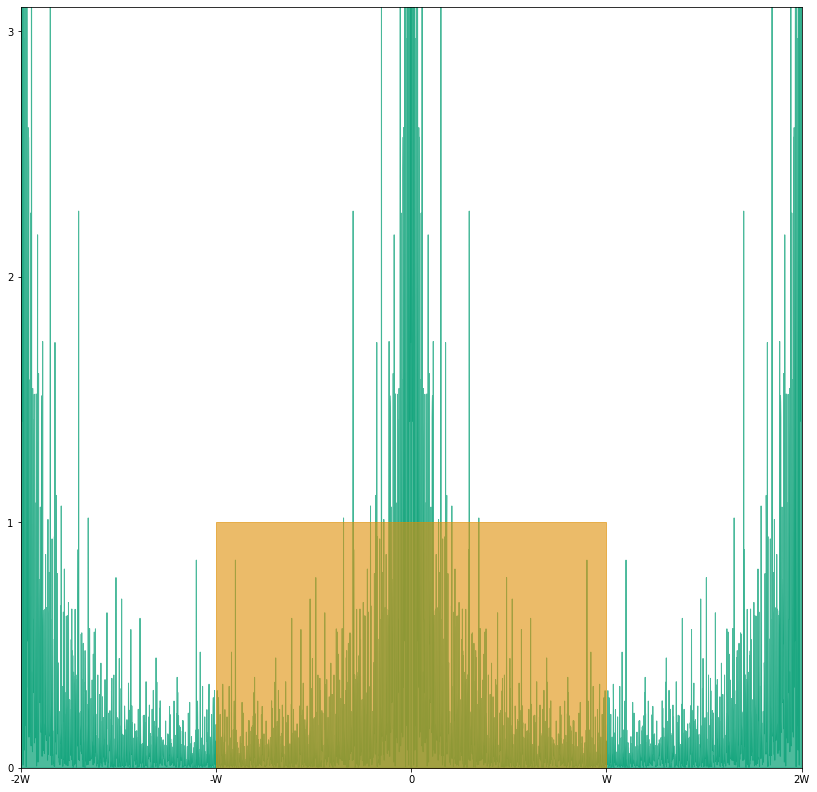

In [11]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.random.pareto(10,1000)*5*(1/t)

plt.fill_between(t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(-t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(t+10,0,np.flip(s,0),alpha=0.7,color=colour_palette[2])
plt.fill_between(-t-10,0,np.flip(s,0),alpha=0.7,color=colour_palette[2])

plt.fill_between([-10,10],0,[1,1],alpha=0.6,color=colour_palette[1])

#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([-20,-10,0,10,20],["-2W","-W","0","W","2W"])
plt.xlim([-20,20])
plt.yticks([0,1,2,3])
plt.ylim([0,3.1])
# plt.grid(True)
print()

# Acting on Impulse

<img src="fireworks.jpeg" width=1080px/>

## How Much Smoke?
(explanation due with thanks and deference t~o Prof. Tom Hynes). 
* Determine how much smoke is in the air at a given moment
* Measure one firework...

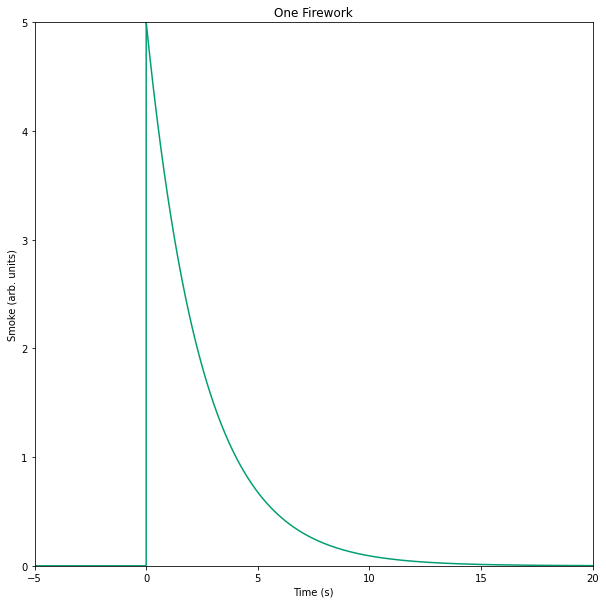

In [12]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,20,2000)
s = 5*np.exp(-0.4*t)
plt.plot(t,s,color=colour_palette[2])
plt.plot([-5,0,0.001],[0,0,5],color=colour_palette[2])
#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])
plt.ylabel("Smoke (arb. units)")
plt.xlabel("Time (s)")
plt.xticks([-5,-0,5,10,15,20])
plt.xlim([-5,20])
plt.ylim([0,5])
plt.title("One Firework")
# plt.grid(True)
print()

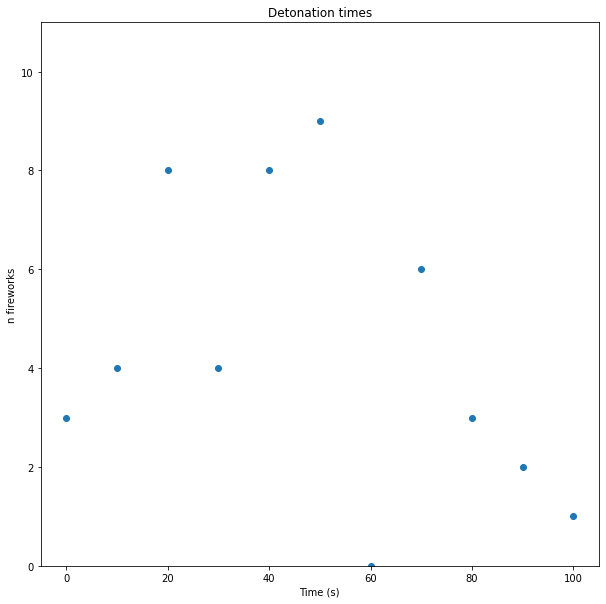

In [13]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]
N_POINTS = 11
counts = np.around(np.random.rand(N_POINTS)*10)
times = np.linspace(0,100,N_POINTS)

plt.scatter(times,counts)

#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])
plt.ylabel("n fireworks")
plt.xlabel("Time (s)")
# plt.xticks([-5,-0,5,10,15,20])
# plt.xlim([-5,20])
plt.title("Detonation times")
plt.ylim([0,11])
# plt.grid(True)
print()

## Impulse Responses and Convolution
* We define an impulse function $\delta(t)$ (a Dirac delta function...) 
$$ \int_{-\infty}^{\infty} f(t) \delta(t) dt = f(0)$$
* It "sifts out" the value at $t=0$.
* Note: $\delta(t - T)$ 'fires' at $t = T$ (i.e. the *argument* is zero)
* What a system does after being excited with $\delta(t)$ is the *impulse response* $h(t)$


* Here, the impulse is delivered by detonation of the firework; the smoke decays away over time afterwards. 
* We calculate the total volume of smoke $f(t)$ by summing up all the smoke left in the air from previous firework detonations
* Let us say the fireworks go off at times $t=1,2,3...$ in quantity $n(t)$. 

* Don't be confused: two variables, $\tau$ and $t$!!!



<img src="t_shirt.jpg"/>
<p style="font-size:8px">Based on https://commons.wikimedia.org/wiki/File:Flag_of_Greece.png by user 
    Chantel</p>

$$ f(t) = \sum_{\tau =0} \left[ h(t - \tau) n(\tau) \right]$$
* "play back" h(t) each time a firework goes off, and sum up the smoke from **all** the fireworks that have gone off to date


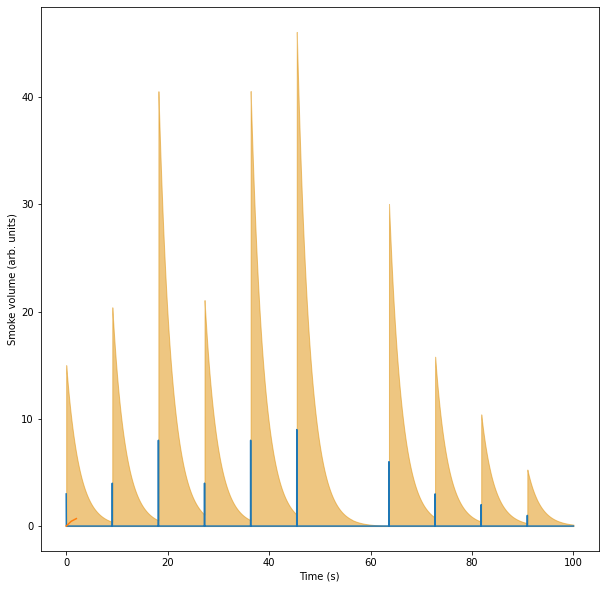

In [14]:
SPACED_POINTS = 10000
full_timebase = np.linspace(0,100,SPACED_POINTS)
padded_detonations = np.zeros(SPACED_POINTS)
for time,val in enumerate(counts):
    padded_detonations[int(time*SPACED_POINTS/N_POINTS)] = val

t = np.linspace(0,20,2000)
s = 5*np.exp(-0.4*t)
smoke = np.convolve(padded_detonations,s)
plt.plot(full_timebase,padded_detonations,colour_palette[0])
plt.fill_between(full_timebase,0,smoke[0:SPACED_POINTS],color=colour_palette[1],alpha=0.5)
plt.ylabel("Smoke volume (arb. units)")
plt.xlabel("Time (s)")
print()

$$f(13) = n(0) \times h(13) \\+ n(10) \times h(3) \\+ n(20) \times  h(-7) \\+ ...$$


...wait...$h(-7)$?
* Causal vs non-causal impulse responses

## Viewers Shocked as Presenter turns Sum Into Integral AGAIN!
$$ h(t) * g(t) = \int_{-\infty}^{\infty} h(t - \tau) g(\tau) d\tau$$
_We can convolve any two functions $h(t)$ and $g(t)$; if we define $h(t)$ to be the impulse response of the system, $g(t)$ is the "stimulus" or driving function._

* (thanks to the property of the delta function by definition, $f(0) = \int_{\infty}^{\infty} \delta(t) f(t) dt$)
* $g(t)$ can be **anything** (well almost)

* Not all systems can be modelled like this: examples?
    

* Several:

    * Magnetics
    * Diodes (sometimes)
    * Transistors (sometimes)
    * Wires????
* System must be linear and time-invariant.

## Final Useful Property of Convolution
$$\mathcal{F}\left[f(t) * g(t)\right] = \mathcal{F}[f(t)] \times \mathcal{F}[g(t)]$$

* The Fourier transform of the convolution of two functions is equal to the **product** of the Fourier transform of each of the functions


_Convolution in the time domain is multiplication in the frequency domain and vice versa_

# Why I Brought You Here
## Top Hat & Tails

* Recall our sampled signal, measured at a series of points. How might we recover intermediate values?
* **Filtering**

* We want to **remove** all signal at frequencies $f : |f| \geq W$
* i.e. multiply by 
$$ \tilde{H}(k) = \begin{cases}
0 & |k| \geq W \\
1 & |k| < W
\end{cases}$$


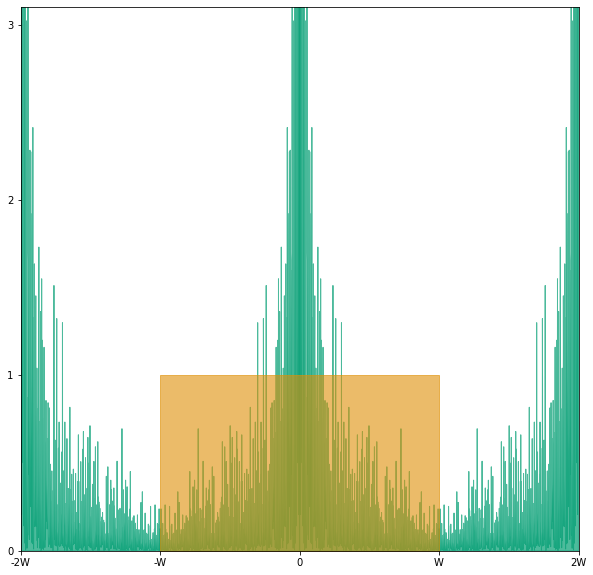

In [15]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(0,10,1000)
s = np.random.pareto(10,1000)*5*(1/t)

plt.fill_between(t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(-t,0,s,alpha=0.7,color=colour_palette[2])
plt.fill_between(t+10,0,np.flip(s,0),alpha=0.7,color=colour_palette[2])
plt.fill_between(-t-10,0,np.flip(s,0),alpha=0.7,color=colour_palette[2])

plt.fill_between([-10,10],0,[1,1],alpha=0.6,color=colour_palette[1])

#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

plt.xticks([-20,-10,0,10,20],["-2W","-W","0","W","2W"])
plt.xlim([-20,20])
plt.yticks([0,1,2,3])
plt.ylim([0,3.1])
# plt.grid(True)
print()

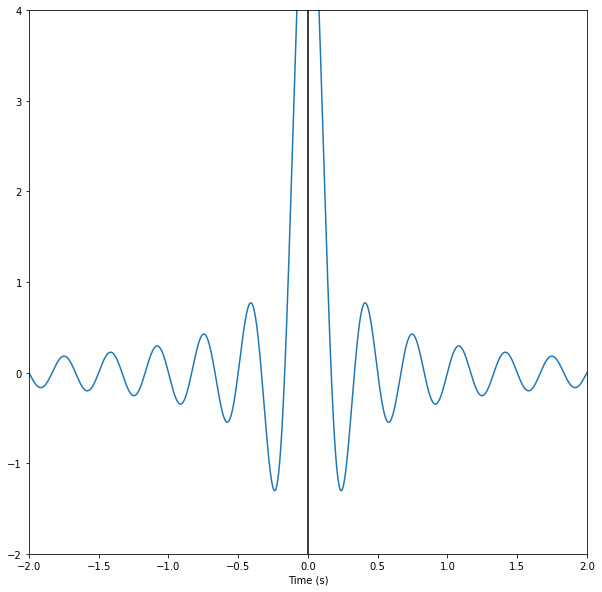

In [16]:
import warnings
from __future__ import print_function
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import seaborn as sns
colour_palette = sns.color_palette("colorblind",3)
plt.figure()
plt.rcParams['figure.figsize']=[10,10]

t = np.linspace(-2,2,1000)


# plt.plot([-20,-10.01,-10,10,10.01,20],[0,0,1,1,0,0],color=colour_palette[1])
h = np.sin(2 * np.pi * t * 3)/(np.pi * t)
plt.plot(t,h)
plt.xlabel("Time (s)")
plt.xlim(-2,2)
plt.ylim(-2,4)
plt.autoscale(False)
plt.plot([0,0],[-1000,1000],color="black")

#plt.plot([x,x],[0,y],color='black')
#plt.fill_between([x,x+1],0,[y,y],alpha=0.5,color=colour_palette[1])

# plt.grid(True)
print()

Conveniently, it turns out that the inverse Fourier transform of our "top hat" is a "sinc": 

$$h(t) = \frac{1}{\pi t} \times sin(2 \pi W t)$$

This is the impulse response of a filter with this property! Hurray!

* In order to get the same effect as cutting off the spectrum outside $(-W,W)$, just convolve with $h(t)$.
* 'sinc interpolation' (as described by Shannon)

### Always a snag
* Non-causal 
* Infinite

## Practical Solutions
* Shift & truncate h(t)
* Gibbs phenomenon (again)
* "Windowing": apply various techniques to this filter

* an animation here???

# Digital Filters
* Not a practical talk: see e.g. Derek Kozel's [reference to gnu radio talk]
* Digital filters just apply the above property: use an impulse response in the time domain to process the signal
* FIR: crude & simple, but expensive.
* IIR: complex and neat, but potentially explosive...feedback!

* Diagrams? animations? tell me what I should use here, technical people


* We've now come full circle: sample a signal, interpolate correctly between the values, and generate the 'waterfall' should you so desire
* FIR 

# Summary slide and the end!